# Explorations of Goodreads User-Book Interactions

**Run this notebook only when you have LARGE memory (recommend 32g+)!**

In [1]:
import gzip
import json
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:,}'.format
%matplotlib inline  

## Load and process the dataset

**Specify your directory here:**

In [2]:
DIR = './'

**Load the huge '.csv' file**

In [3]:
PATH_IN = os.path.join(DIR, 'goodreads_interactions.csv')
df_interactions = pd.read_csv(PATH_IN)

**Take a look of the first 5 lines;**

**Check if there're any duplicated (user_id, book_id) pairs in the file.**

In [4]:
print('=== first 5 records ===')
display(df_interactions.head())
print('=== duplicated records ===')
display(df_interactions[df_interactions.duplicated(['user_id', 'book_id'], keep=False)])
print('ideally you will not see any rows displayed above, then we are good now, no duplicates.')

=== first 5 records ===


,user_id,book_id,is_read,rating,is_reviewed
0,0,948,1,5,0
1,0,947,1,5,1
2,0,946,1,5,0
3,0,945,1,5,0
4,0,944,1,5,0


=== duplicated records ===


,user_id,book_id,is_read,rating,is_reviewed


ideally you will not see any rows displayed above, then we are good now, no duplicates.


## Display basic statistics

'# shelved': the total number of records in this file

'# read': the number of records where users read the books

'# rated': the number of records where users provided rating scores for the books

'# reviewed': the number of records where the book review texts are not empty

In [5]:
df_stats = pd.DataFrame([df_interactions.shape[0],
                         df_interactions['is_read'].sum(),
                         (df_interactions['rating']>0).sum(),
                         df_interactions['is_reviewed'].sum()], dtype = float, 
                        columns = ['count'],
                        index = ['# shelve', '# read', '# rate', '# review'])
display(df_stats)

,count
# shelve,"228,648,342.0"
# read,"112,131,203.0"
# rate,"104,551,549.0"
# review,"16,219,149.0"


display rating distribution ('0' indicates rating score is not provided)

In [6]:
df_rating_count = df_interactions['rating'].value_counts().astype(float)
display(df_rating_count)

0   124,096,793.0
4    37,497,451.0
5    35,506,166.0
3    23,307,457.0
2     6,189,946.0
1     2,050,529.0
Name: rating, dtype: float64

## Visualize user/item distributions

**1) count the number of interactions for each user/item**

**2) count the frequency of these numbers (i.e., ranks)**

**3) visulize for each type of interaction (log-log plots)**

we'll see distributions are long-tailed, approximately follow power-law (zipf's law)

In [7]:
shelve_user = df_interactions['user_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_user = df_interactions['user_id'].loc[df_interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_user = df_interactions['user_id'].loc[df_interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_user = df_interactions['user_id'].loc[df_interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

shelve_book = df_interactions['book_id'].value_counts().value_counts().reset_index().sort_values('index').values
read_book = df_interactions['book_id'].loc[df_interactions['is_read']>0].value_counts().value_counts().reset_index().sort_values('index').values
rate_book = df_interactions['book_id'].loc[df_interactions['rating']>0].value_counts().value_counts().reset_index().sort_values('index').values
review_book = df_interactions['book_id'].loc[df_interactions['is_reviewed']>0].value_counts().value_counts().reset_index().sort_values('index').values

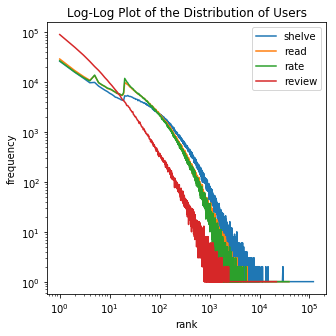

In [8]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_user[:,0], shelve_user[:,1], label='shelve')
plt.loglog(read_user[:,0], read_user[:,1], label='read')
plt.loglog(rate_user[:,0], rate_user[:,1], label='rate')
plt.loglog(review_user[:,0], review_user[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Users')
plt.legend(loc='upper right')

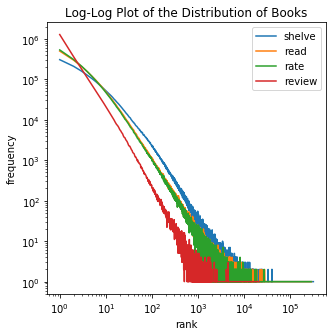

In [9]:
plt.figure(figsize=(5,5))
plt.loglog(shelve_book[:,0], shelve_book[:,1], label='shelve')
plt.loglog(read_book[:,0], read_book[:,1], label='read')
plt.loglog(rate_book[:,0], rate_book[:,1], label='rate')
plt.loglog(review_book[:,0], review_book[:,1], label='review')
plt.xlabel('rank')
plt.ylabel('frequency')
plt.title('Log-Log Plot of the Distribution of Books')
plt.legend(loc='upper right')